# Dylan Widjaja 26002304596
## Dataset : Life Expectancy Data from 2000-2015
## Goal : What factors most significantly influence life expectancy for developing countries?


## Downloading the Dataset

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("kumarajarshi/life-expectancy-who")

print("Path to dataset files:", path)

Path to dataset files: /Users/dwidjaja/.cache/kagglehub/datasets/kumarajarshi/life-expectancy-who/versions/1


## Explanation of the Dataset

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importing the dataset from CSV to Pandas.DataFrame
data = pd.read_csv(path + "/Life Expectancy Data.csv")
data.columns = data.columns.str.strip() #Cleaning leading and trailing spaces from df columns
print(data.columns)

Index(['Country', 'Year', 'Status', 'Life expectancy', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')


### Explanation of the Dataset
A Global Health Observatory (GHO) data repository under the World Health Organization (WHO) that keeps track of health related factors for all countries for life expectancy forecasting. Data from the year 2000-2015 for 193 countries were collected for this purpose. Some missing data were initially discovered from the WHO database. Most of the missing data was for population, Hepatitis B, and GDP for countries such as Vanuatu, Tonga, Togo, Cabo Verde etc. Finding the data for these countries were deemed too difficult and as such were excluded from the data set. All predicting variables can be categorized into Immunization related factors, Mortality factors, Economical factors and Social factors.
### Columns
* Country : Country
* Year : Year
* Status : Developed or Developing Country
* Life expectancy : Life Expectancy in age
* Adult Mortality : Out of 1000 adults aged 15, how many are expected to die before they turn 60
* infant deaths : Number of infant (from birth to one year old) death per 1000 population
* Alcohol : How many liters of alcohol is consumed on average by a person aged 15 or older
* percentage expenditure : Expenditure on health as a percentage of Gross Domestic Product per capita(%)
* Hepatitis B : Hepatitis B (HepB) immunization coverage among 1-year-olds (%)
* Measles : Number of reported measles cases per 1000 population
* BMI : Average body mass index of entire population
* under-five deaths : Number of under-five deaths per 1000 population
* Polio : Polio (Pol3) immunization coverage among 1-year-olds (%)
* Total expenditure : General government expenditure on health as a percentage of total government expenditure (%)
* Diphteria : Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage among 1-year-olds (%)
* HIV/AIDS : Out of 1,000 babies born, how many children under the age of five die from HIV/AIDS
* GDP : Gross Domestic Product per capita (in USD)
* Population : Population of the country
* thinness 1-19 years : Prevalence of thinness among children and adolescents for Age 10 to 19 (%)
* thinness 5-9 years : Prevalence of thinness among children for Age 5 to 9(%)
* Income composition of resources : Human Development Index in terms of income composition of resources (index ranging from 0 to 1)
* Schooling : Number of years of Schooling (years) 

In [3]:
# Selecting only developing countries
developing = data[data["Status"] == "Developing"]
developing = developing.set_index("Year")
print(f"Number of developing countries: {developing['Country'].nunique()}")

# Checking for missing values
developing.isnull().sum()

Number of developing countries: 161


Country                              0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            166
percentage expenditure               0
Hepatitis B                        380
Measles                              0
BMI                                 34
under-five deaths                    0
Polio                               19
Total expenditure                  194
Diphtheria                          19
HIV/AIDS                             0
GDP                                384
Population                         556
thinness  1-19 years                34
thinness 5-9 years                  34
Income composition of resources    119
Schooling                          115
dtype: int64

## Handling missing values

In [4]:
# Drop countries where an entire column of data is missing 
factor_cols = developing.columns.difference(["Country"])

def has_any_column_fully_missing(group):
    return group[factor_cols].isna().all().any()

countries_to_drop = (
    developing.groupby('Country')
    .filter(has_any_column_fully_missing)['Country']
    .unique()
)

developing = developing[~developing['Country'].isin(countries_to_drop)]
developing.isnull().sum()

Country                              0
Status                               0
Life expectancy                      0
Adult Mortality                      0
infant deaths                        0
Alcohol                            113
percentage expenditure               0
Hepatitis B                        291
Measles                              0
BMI                                  0
under-five deaths                    0
Polio                                8
Total expenditure                  115
Diphtheria                           8
HIV/AIDS                             0
GDP                                 18
Population                           4
thinness  1-19 years                 0
thinness 5-9 years                   0
Income composition of resources      0
Schooling                            0
dtype: int64

In [5]:
# Fill all missing values with the mean of its surrounding values 
numeric_cols = developing.select_dtypes(include=['number']).columns

def interpolate_numeric(group):
    group[numeric_cols] = group[numeric_cols].interpolate(method='linear', limit_direction='both')
    return group

developing = (
    developing.sort_index()
      .groupby('Country')
      .apply(interpolate_numeric)
      .reset_index(drop=True)
)

developing.isnull().sum()

/var/folders/_1/s9ktrnx12xn9fhgcp2bh12m00000gn/T/ipykernel_22493/1493036813.py:11: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(interpolate_numeric)


Country                            0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
BMI                                0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
Population                         0
thinness  1-19 years               0
thinness 5-9 years                 0
Income composition of resources    0
Schooling                          0
dtype: int64

In [6]:
# Selecting Indonesia for visualization 
idn = developing[developing["Country"] == "Indonesia"]
# Removing all columns without numerical data for visualization 
idn = idn.drop("Country", axis=1)
idn = idn.drop("Status", axis=1)
idn 

,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
784,66.3,188.0,187,0.06,3.433344,65.0,3344,15.4,237,72.0,1.98,75.0,0.1,78.927440,21154429.0,11.0,11.2,0.597,10.7
785,66.5,188.0,182,0.06,33.958371,62.0,3825,16.0,229,77.0,2.23,76.0,0.1,747.981745,2145652.0,11.0,11.1,0.604,10.6
786,66.7,189.0,177,0.05,43.178673,63.0,14492,16.7,222,8.0,2.27,7.0,0.1,899.555686,2175859.0,11.0,11.1,0.608,10.6
787,66.9,189.0,173,0.05,8.460156,64.0,24457,17.5,215,8.0,2.53,71.0,0.1,164.594470,22545214.0,1.9,11.0,0.613,10.8
788,65.3,213.0,174,0.06,55.361072,64.0,29171,18.2,237,79.0,2.37,71.0,0.1,1148.569960,223614649.0,1.9,1.9,0.624,11.0
789,67.2,19.0,163,0.06,5.381783,65.0,15853,19.0,201,79.0,2.79,72.0,0.1,126.928834,22671273.0,1.9,1.9,0.629,11.1
790,67.3,191.0,159,0.06,72.015932,66.0,20422,19.7,194,78.0,2.91,72.0,0.1,1586.254000,22983822.0,1.8,1.8,0.632,10.9
791,67.5,19.0,154,0.06,102.633435,76.0,19456,2.5,188,77.0,3.10,73.0,0.2,1855.939150,232989141.0,1.8,1.7,0.638,11.0
792,67.7,189.0,149,0.07,10.263411,82.0,15369,21.3,181,83.0,2.81,77.0,0.2,216.527660,236159276.0,1.7,1.7,0.641,11.7
793,67.9,189.0,143,0.08,125.798068,82.0,20818,22.1,174,85.0,2.83,78.0,0.3,2254.445660,23934478.0,1.7,1.6,0.645,11.7


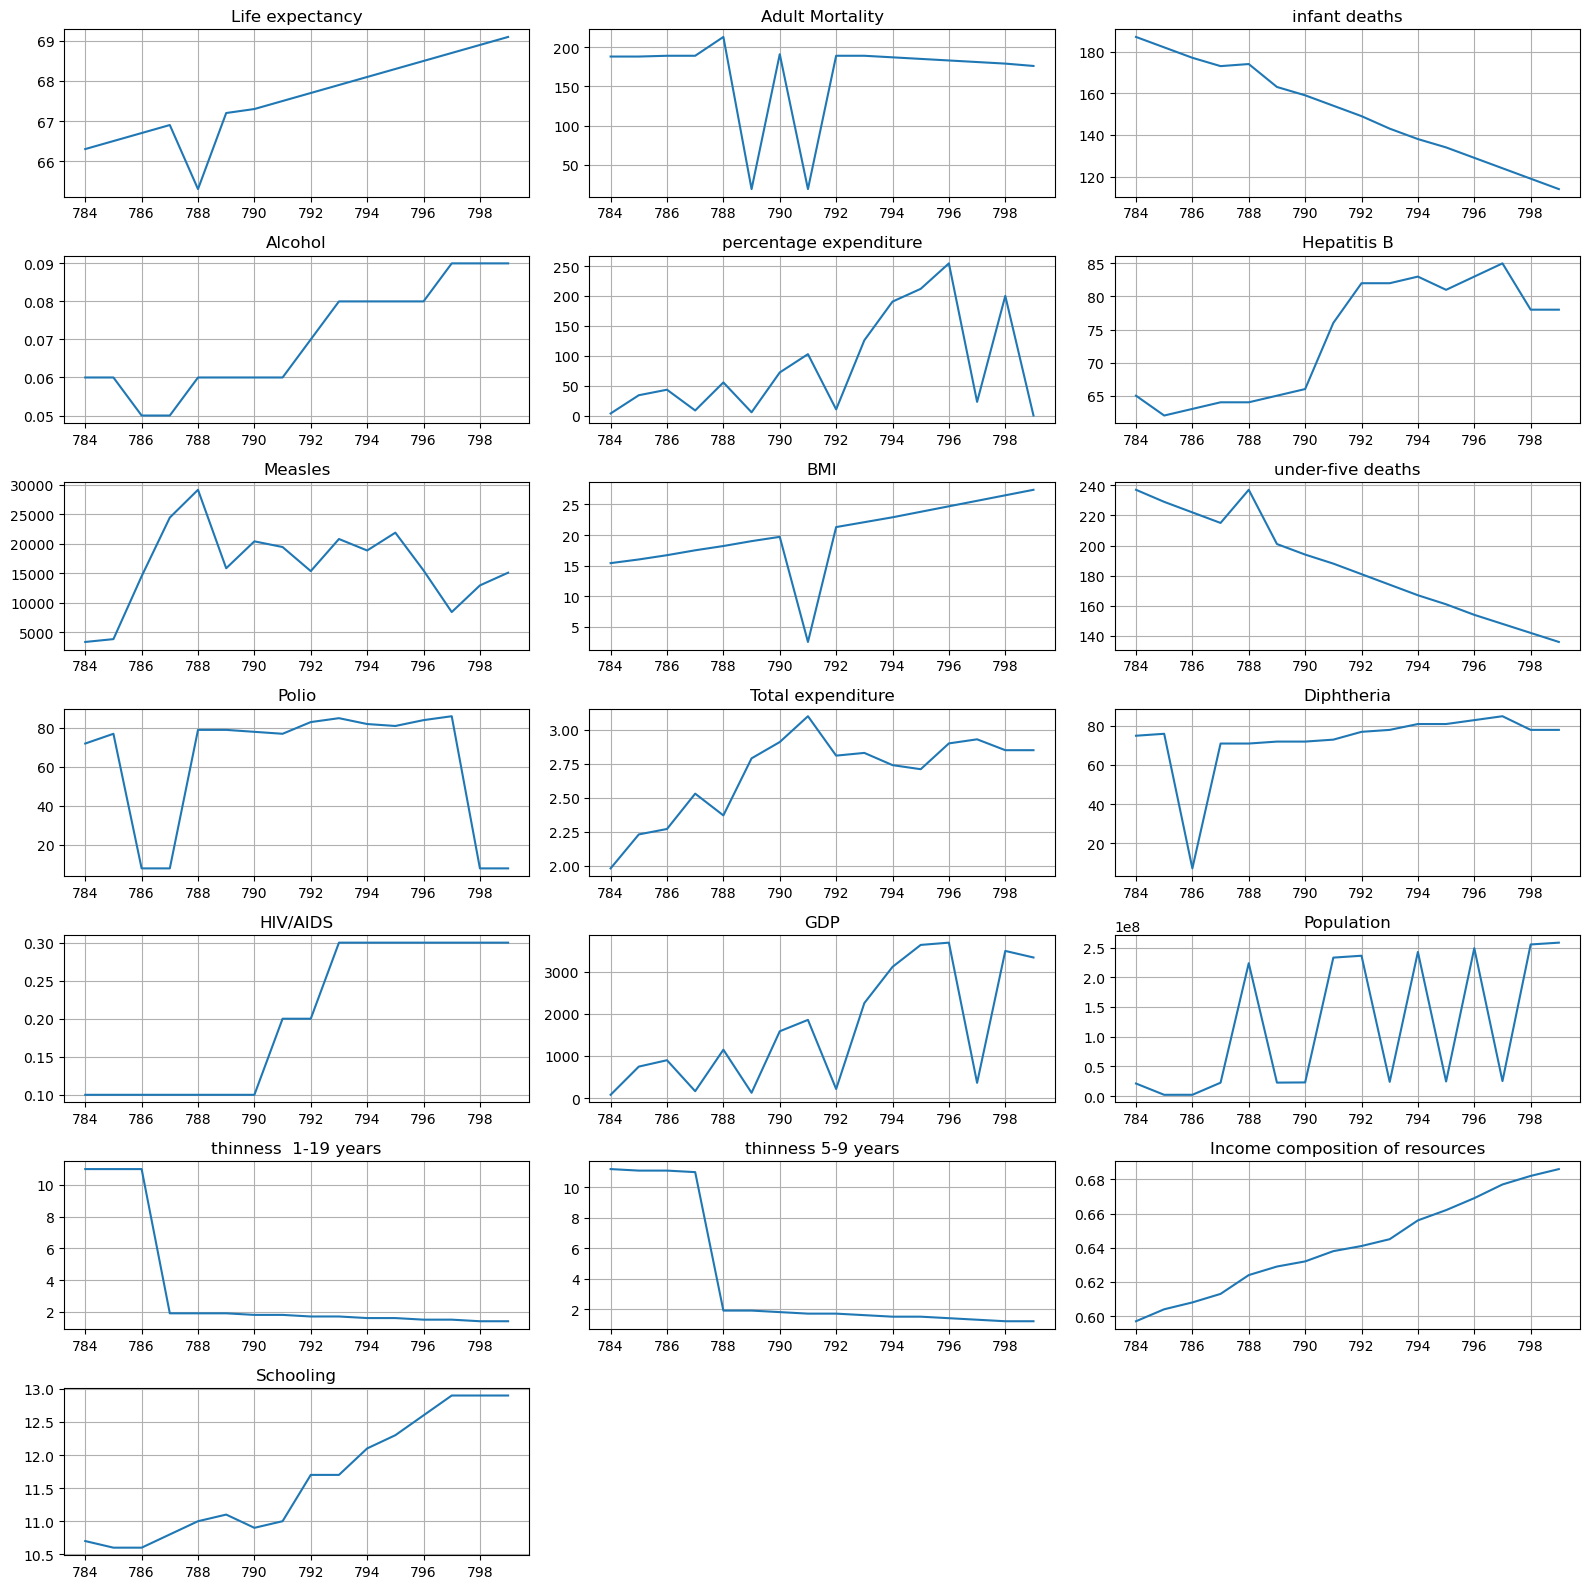

In [7]:
# Plotting every column over time 
fig, axes = plt.subplots(nrows=7, ncols=3, figsize=(16, 16))  # 7x3 grid

axes = axes.flatten() # turns the 2D array of axes into a 1D list for easy looping.

for i, col in enumerate(idn.columns):  # Creating a plot for each column
    axes[i].plot(idn.index, idn[col])
    axes[i].set_title(col)
    axes[i].grid(True)

# Hide any unused subplots (if less than 20 columns)
for j in range(i+1, 21):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

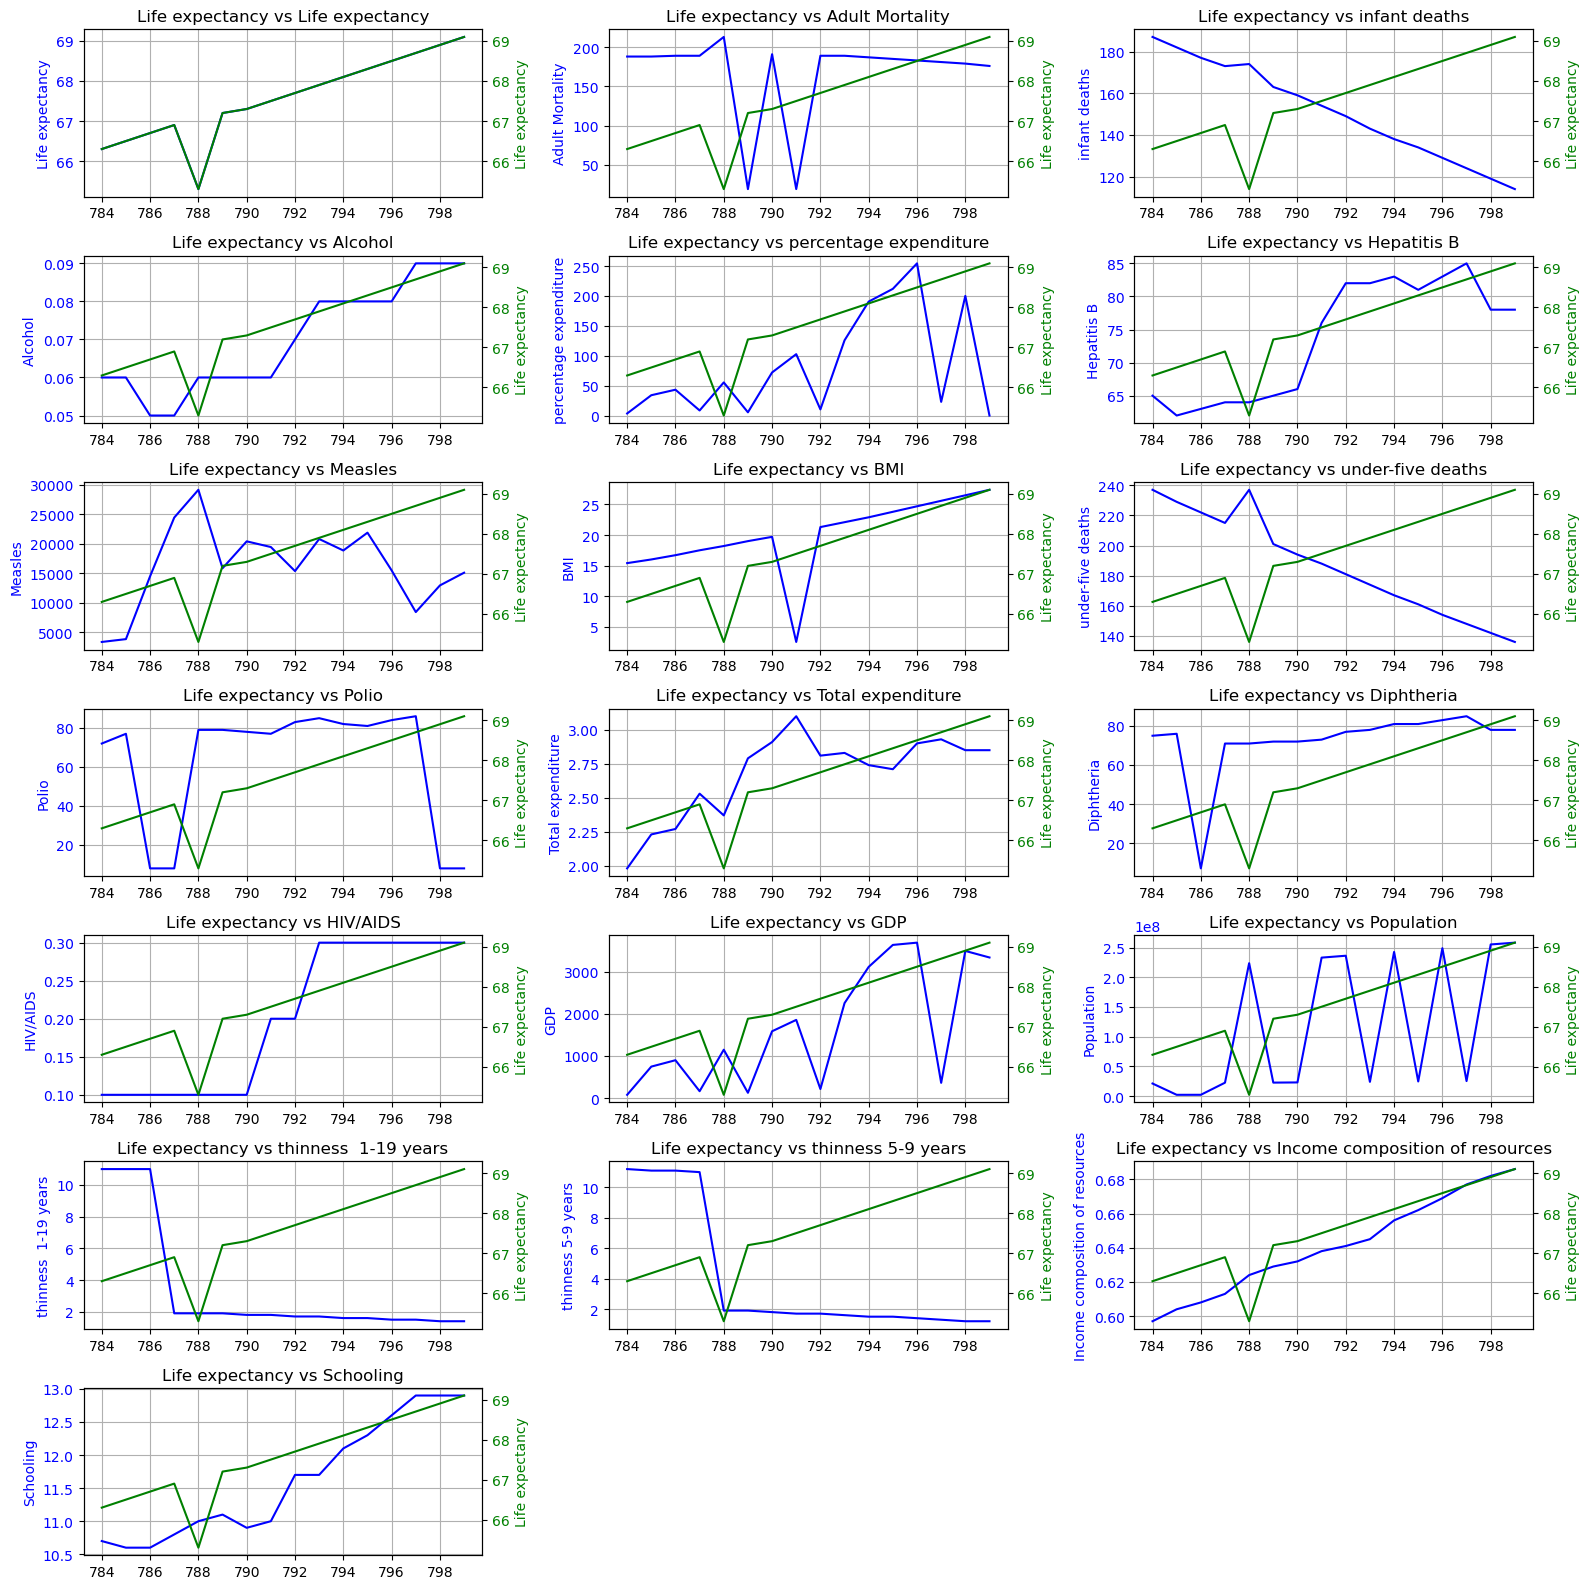

In [8]:
# Overlay life expectancy over each column to see if any trends are correlated 

# Plotting every column over time 
fig, axes = plt.subplots(nrows=7, ncols=3, figsize=(16, 16))  # 7x3 grid

axes = axes.flatten() # turns the 2D array of axes into a 1D list for easy looping.

for i, col in enumerate(idn.columns):  # Creating a plot for each column
    axes[i].plot(idn.index, idn[col], color='blue', label='Adult Mortality')
    axes[i].set_ylabel(col, color='blue')
    axes[i].tick_params(axis='y', labelcolor='blue')

    ax2 = axes[i].twinx()
    ax2.plot(idn.index, idn["Life expectancy"], color='green', label='Life expectancy')
    ax2.set_ylabel('Life expectancy', color='green')
    ax2.tick_params(axis='y', labelcolor='green')

    axes[i].set_title(f"Life expectancy vs {col}")
    axes[i].grid(True)

# Hide any unused subplots (if less than 20 columns)
for j in range(i+1, 21):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

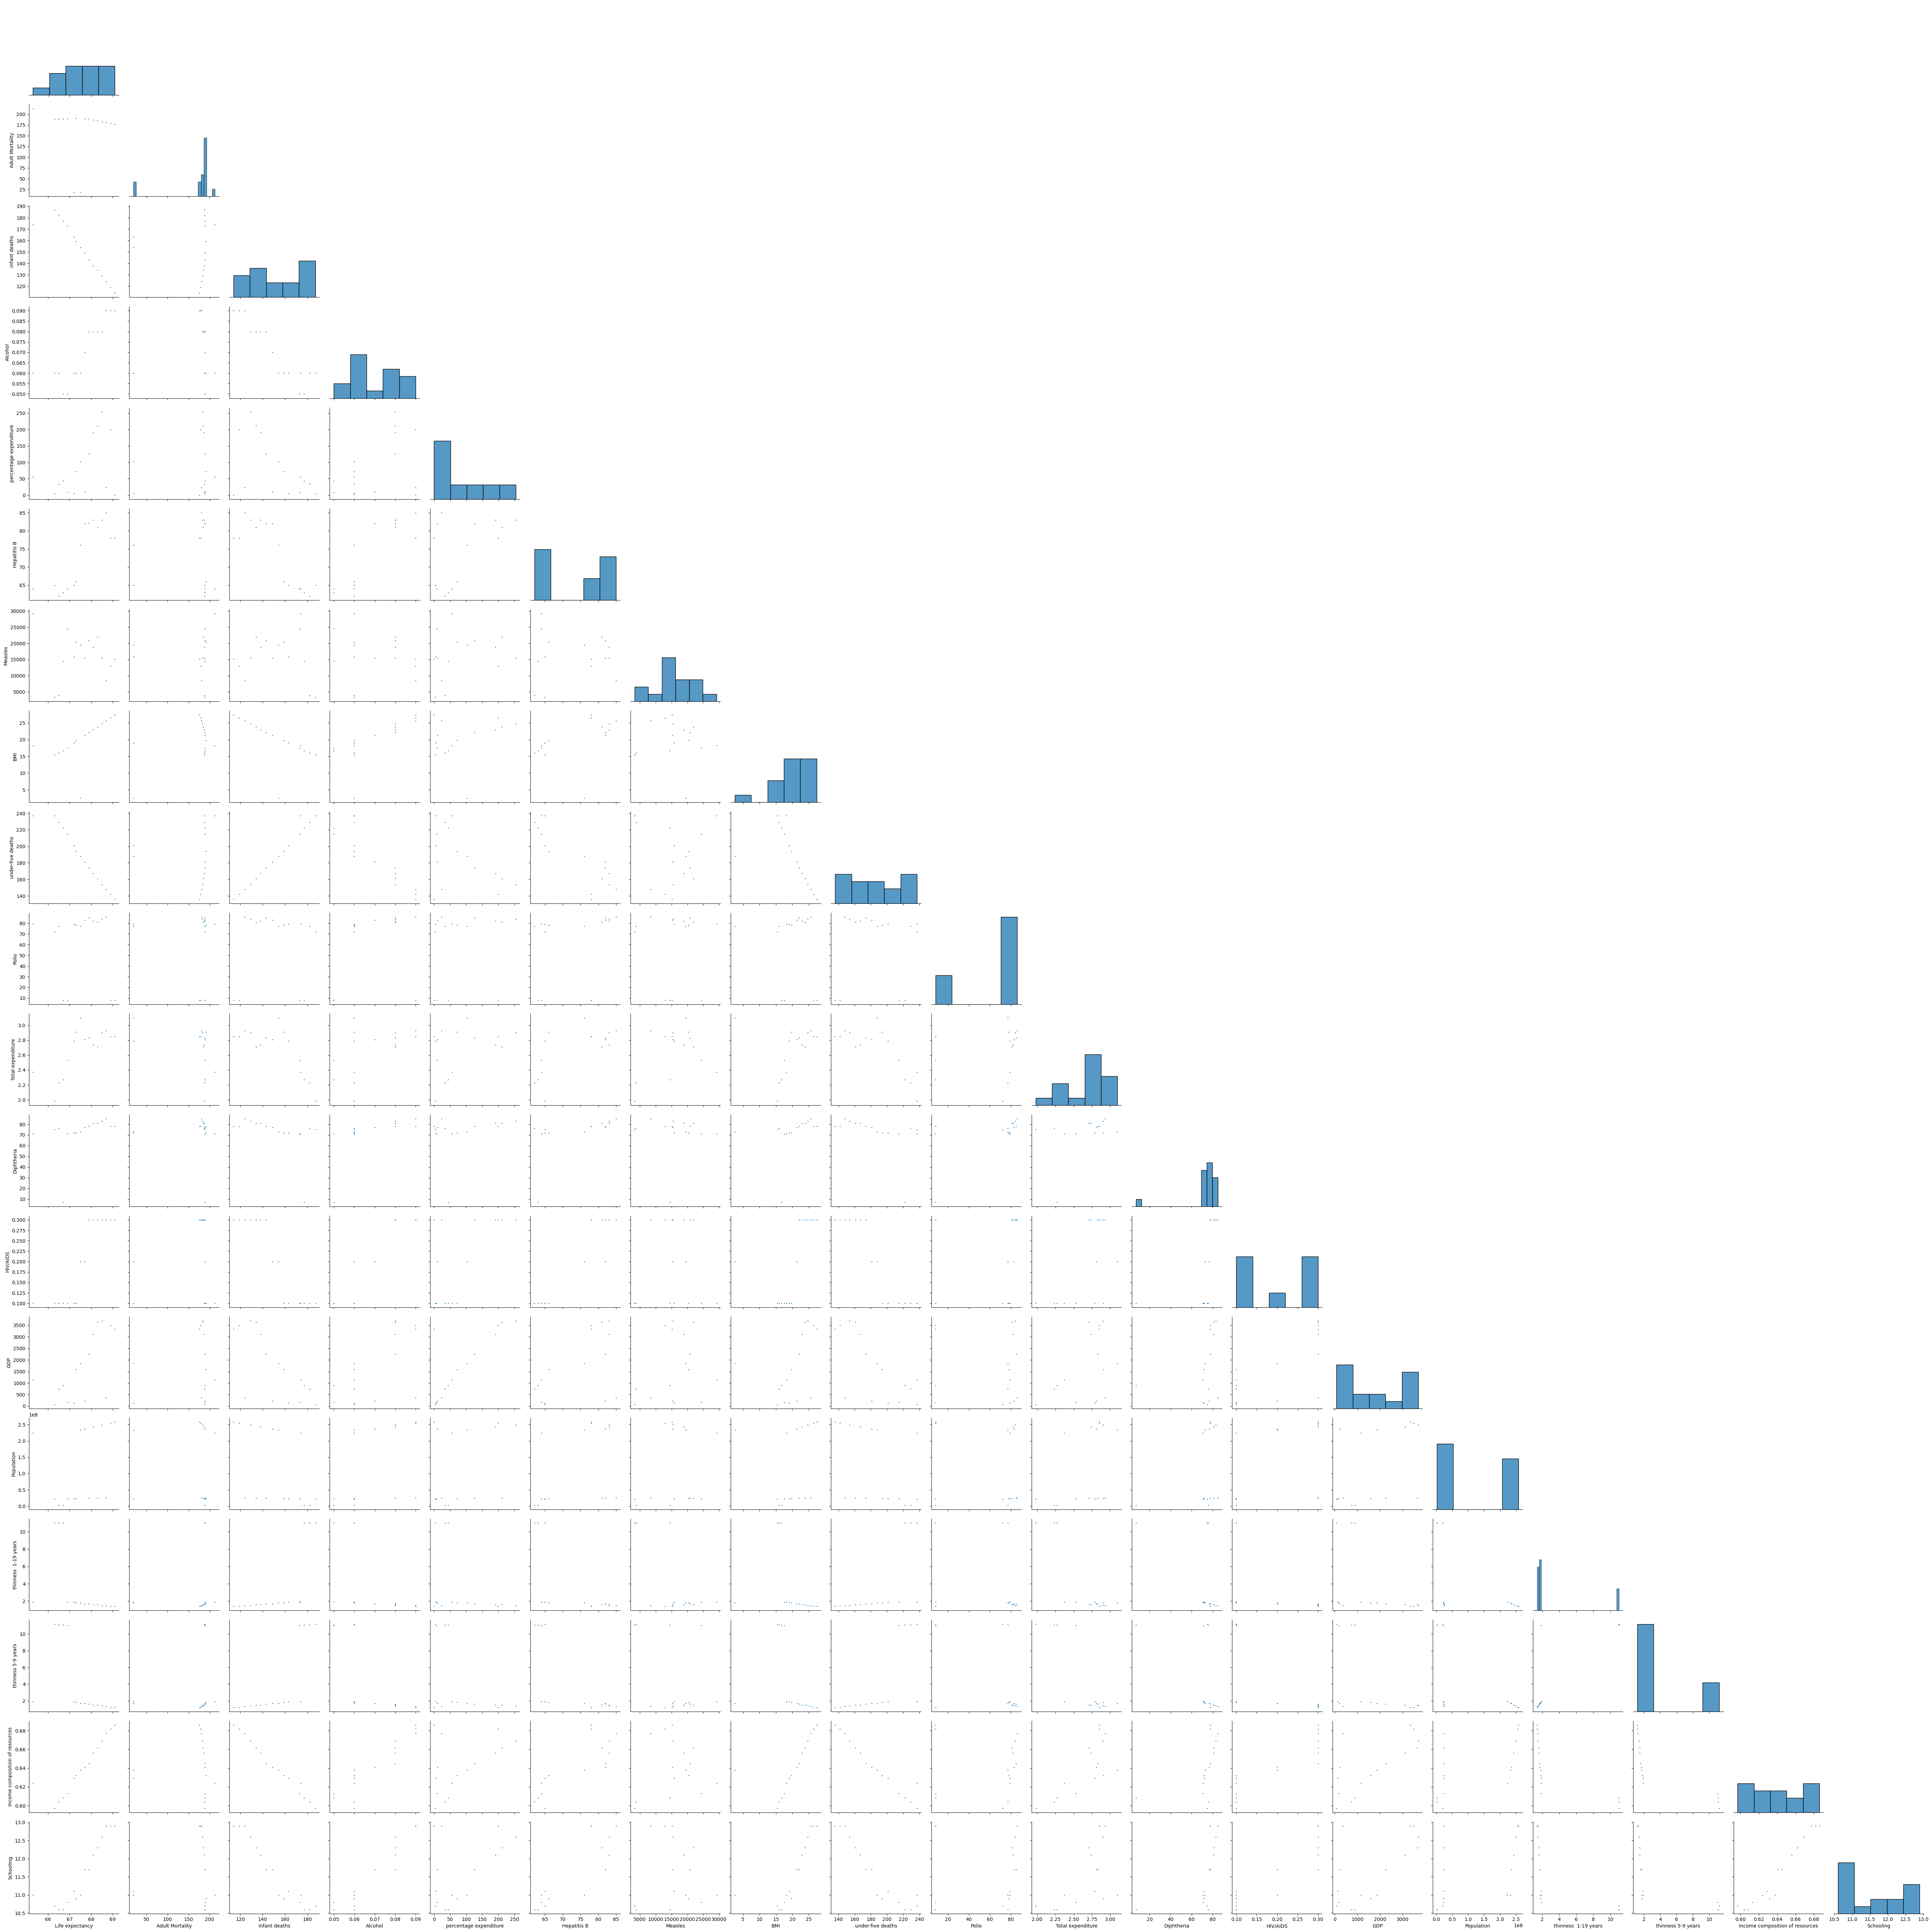

In [12]:
# Creating scatterplot matrices to see the correlations of each factors on each other 
sns.pairplot(idn, plot_kws=dict(linewidth=0, s=4), corner=True);

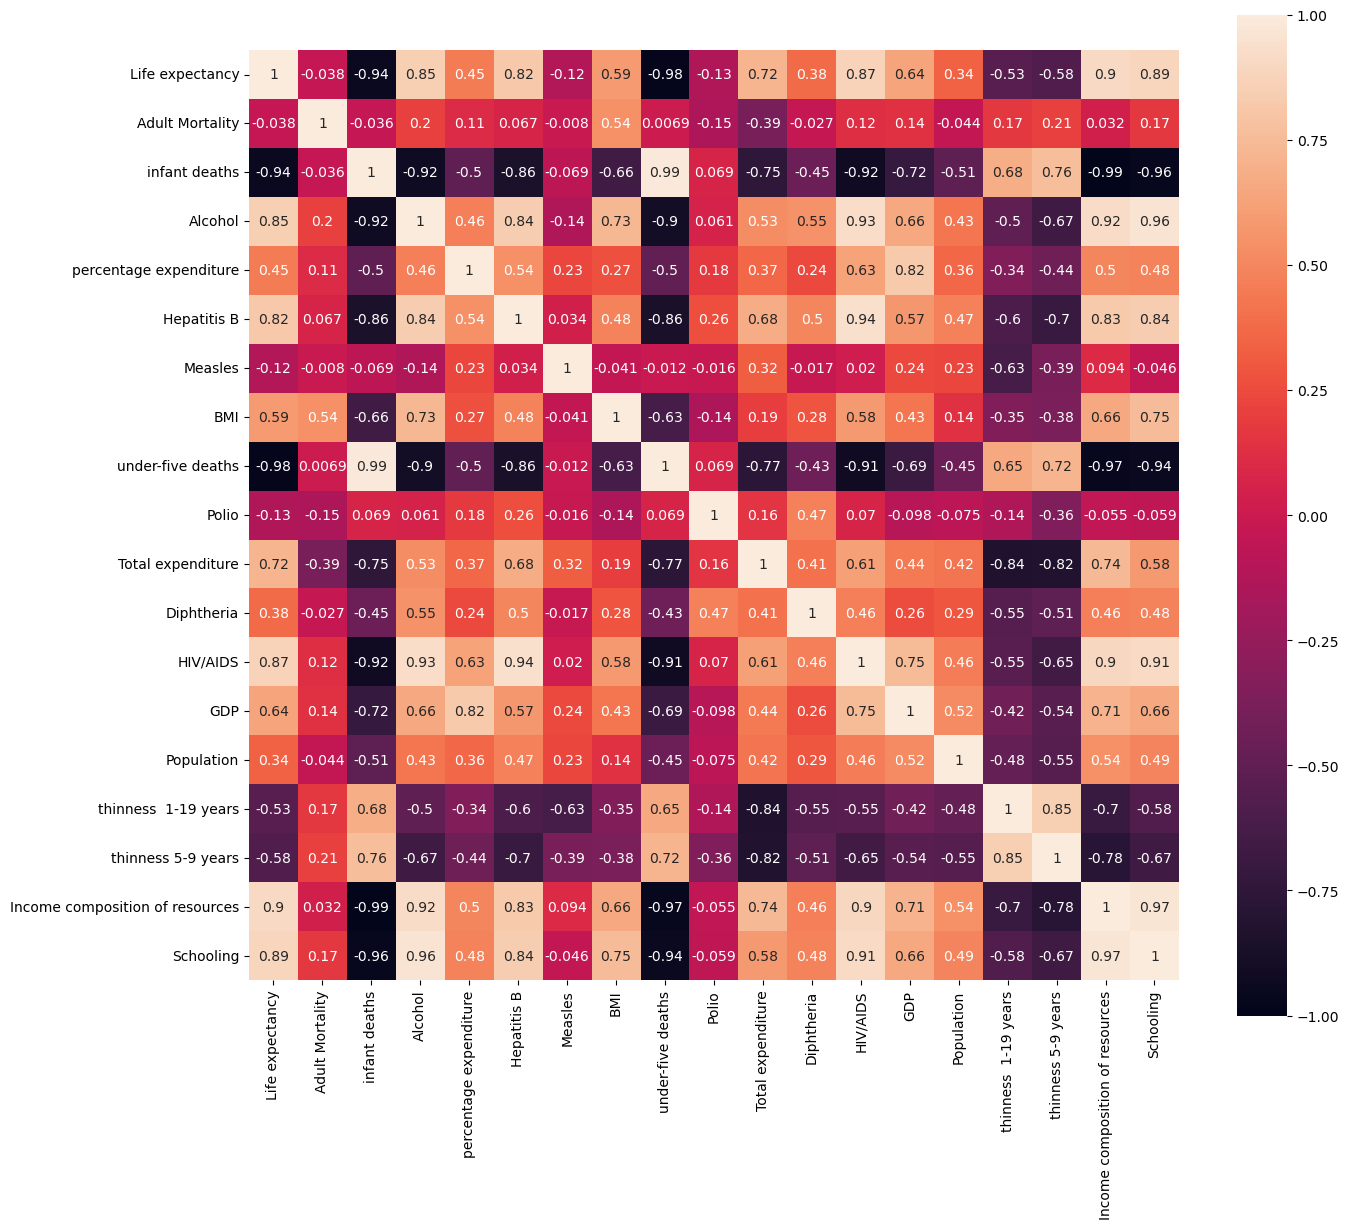

In [16]:
f, ax = plt.subplots(figsize=(15, 13))
corr = idn.corr()
sns.heatmap(corr,
    vmin=-1.0, vmax=1.0,
    square=True, ax=ax, annot=True);

# TODO
## Find the factors that are most correlated to life expectancy (Try out different countries as well)
## Do Key Descriptive Statistics
## Identify Trends, Outliers, and Patterns in the data